In [5]:
import os
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.io import wavfile
import noisereduce as nr
import wave
import numpy as np
from pydub import AudioSegment
from matplotlib.pyplot import figure
from scipy.io.wavfile import read
from sklearn.neighbors import KNeighborsClassifier


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
absolute_path = os.path.dirname(
    "E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/")
relative_path = "pattern"

fullpath = os.path.join(absolute_path, relative_path)


In [7]:
for count, filename in enumerate(os.listdir(fullpath)):
    print(filename)


.DS_Store
AnhSon
ChiBi


In [6]:
def calc_distances(sound_file):
    min_val = 10000

    fs, data = read(sound_file)
    data_size = len(data)

    focus_size = int(0.15 * fs)

    focuses = []
    distances = []
    idx = 0

    while idx < len(data):
        if data[idx] > min_val:
            mean_idx = idx + focus_size // 2
            focuses.append(float(mean_idx) / data_size)
            if len(focuses) > 1:
                last_focus = focuses[-2]
                actual_focus = focuses[-1]
                distances.append(actual_focus - last_focus)
            idx += focus_size
        else:
            idx += 1
    return distances

In [7]:
def accept_test(pattern, test, min_error):
    if len(pattern) > len(test):
        return False
    for i, dt in enumerate(pattern):
        if not dt - test[i] < min_error:
            return False
    return True


### plot wav files

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test.wav
8196


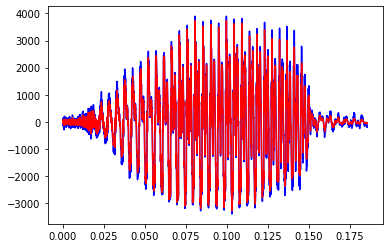

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test1.wav
7655


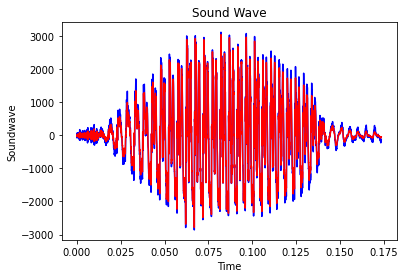

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test2.wav
7926


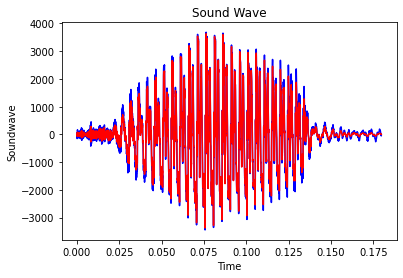

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test3.wav
7385


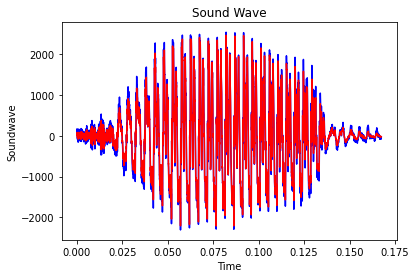

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test4.wav
7835


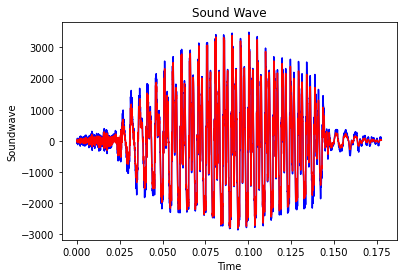

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test5.wav
7115


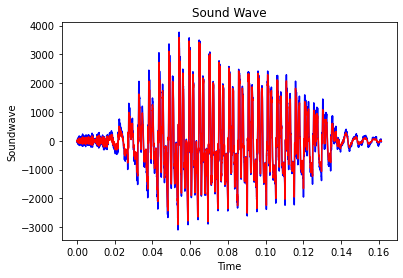

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test6.wav
7565


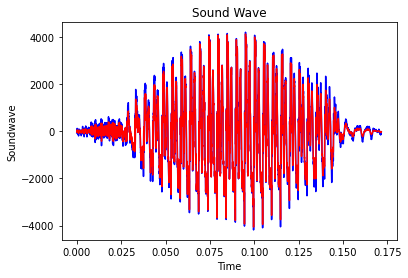

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test7.wav
8196


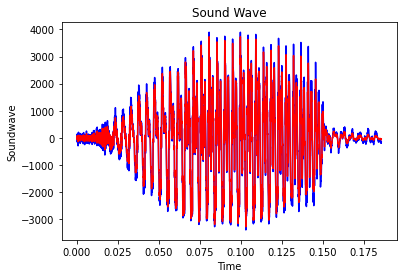

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test0.wav
5878


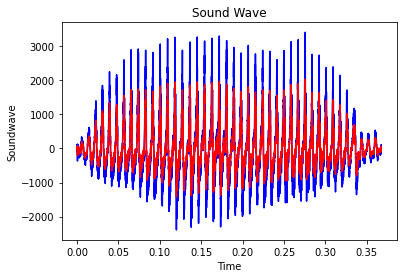

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test1.wav
5350


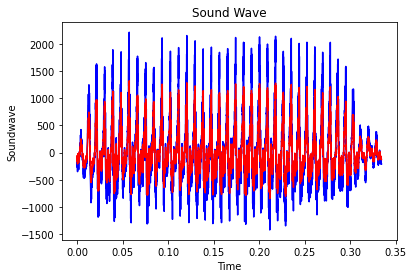

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test2.wav
5276


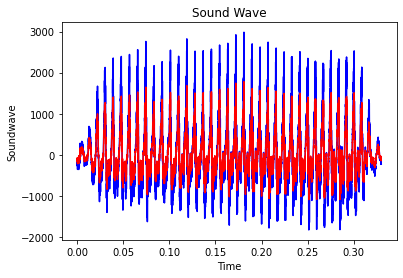

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test3.wav
6632


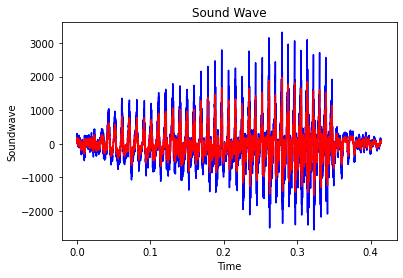

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test4.wav
4598


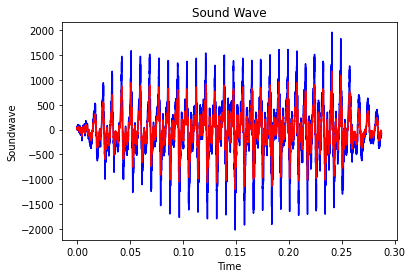

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test5.wav
4822


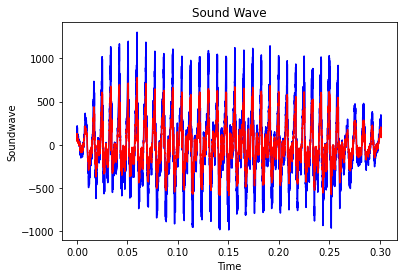

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test6.wav
5352


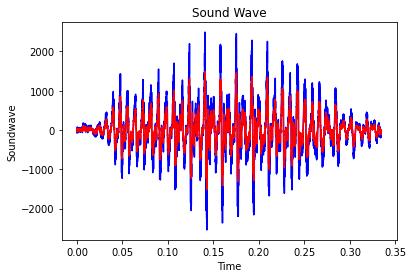

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test7.wav
5126


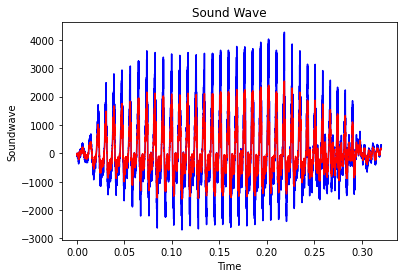

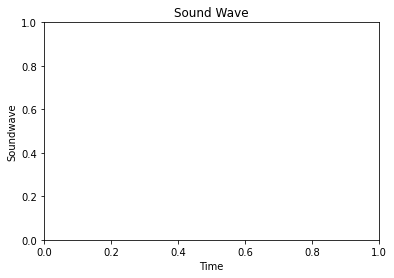

In [6]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon" or filename == "ChiBi":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "conv-wav":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    audiopath = os.path.join(subsubpath, f1)

                    print(audiopath)
                    raw = wave.open(audiopath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()

                    time = np.linspace(
                        0,  # start
                        len(signal) / f_rate,
                        num=len(signal)
                    )
                    print(len(signal))

                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'b')

                    # load data
                    r, d = wavfile.read(f"{audiopath}")
                    # perform noise reduction
                    reduced_noise = nr.reduce_noise(y=d, sr=r)
                    wavfile.write(
                        f"{subpath}/reduce-noise/test{c1}.wav", r, reduced_noise)

                    # do a comparison of the reduced noise files
                    adjusted_filepath = os.path.join(subpath, "reduce-noise")
                    adjusted_filepath = os.path.join(
                        adjusted_filepath, f"test{c1}.wav")

                    raw = wave.open(adjusted_filepath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()


                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'r')

                    # shows the plot
                    # in new window
                    plt.show()

                    # title of the plot
                    plt.title("Sound Wave")

                    # label of x-axis
                    plt.xlabel("Time")
                    plt.ylabel("Soundwave")


### Process audio files

In [ ]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "reduce-noise":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    if f1.endswith('wav'):
                        audiopath = os.path.join(subsubpath, f1)
                        print(audiopath)
                        fs, data = read(audiopath)
                        # we will use the size of the array
                        # to determine the duration of the sound
                        data_size = len(data)

                        # build k-nearest neighbors
                        # ...

                        pattern = calc_distances(f1)
                        test = calc_distances()  # filename to be processed #type: ignore

                        min_error = 0.1

                        print(accept_test(pattern, test, min_error))


In [8]:
pattern = calc_distances(f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav")
test = calc_distances(f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav")

In [6]:
input_data = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"

raw = wave.open(input_data)
raw1 = wave.open(input_data1)

signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype="int16")
signal1 = raw1.readframes(-1)
signal1 = np.frombuffer(signal1, dtype="int16")

# gets the frame rate
f_rate = raw.getframerate()
f_rate1 = raw1.getframerate()

time = np.linspace(
    0,  # start
    len(signal) / f_rate,
    num=len(signal)
)
time1 = np.linspace(
    0,  # start
    len(signal1) / f_rate1,
    num=len(signal1)
)

# using matplotlib to plot
# creates a new figure
plt.plot(time, signal, 'b')
# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


plt.show()
plt.plot(time1, signal1, 'r')

# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


NameError: name 'wave' is not defined

In [10]:
t1 = os.path.join(absolute_path, "dataset")
t1 = os.path.join(t1, "Son")
t1 = os.path.join(t1, "KH-CN")
t1 = os.path.join(t1, "KH-CN03.wav")
print(calc_distances(t1))

[0.23424286541904166, 0.05731680655771915]


In [11]:
my_set = calc_distances(t1)

my_set[0]

0.23424286541904166

In [12]:
# start = 0
# end = 0

# if accept_test(pattern, t1, min_error):
#     min_val = 10000

#     fs, data = read(t1)
#     data_size = len(data)

#     # The number of indexes on 0.15 seconds
#     focus_size = int(0.15 * fs)

#     focuses = []
#     distances = []
#     idx = 0

#     while idx < len(data):
#         if data[idx] > min_val:
#             mean_idx = idx + focus_size // 2
#             focuses.append(float(mean_idx) / data_size)
#             if len(focuses) > 1:
#                 last_focus = focuses[-2]
#                 actual_focus = focuses[-1]
#                 distances.append(actual_focus - last_focus)
#                 start = start * 1000 #Works in milliseconds
#                 end = 
#                 end = end * 1000
#                 newAudio = AudioSegment.from_wav(t1)
#                 newAudio = newAudio[start:end]
#                 newAudio.export('newSong.wav', format="wav")
#             idx += focus_size
#         else:
#             idx += 1


In [10]:
snippet = input_data1
source = input_data

# read the sample to look for
rate_snippet, snippet = wavfile.read(snippet)

snippet = snippet.reshape(-1, 1)
snippet = np.array(snippet[:,0], dtype='float')

# read the source
rate, source = wavfile.read(source)

source = source.reshape(-1, 1)
source = np.array(source[:,0], dtype='float')

# resample such that both signals are at the same sampling rate (if required)
if rate != rate_snippet:
    num = int(np.round(rate*len(snippet)/rate_snippet))
    snippet = signal.resample(snippet, num) # type: ignore

NameError: name 'input_data1' is not defined

Text(0.5, 1.0, 'snippet')

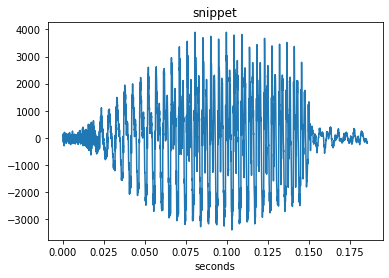

In [14]:
x_snippet = np.arange(0, snippet.size) / rate_snippet # type: ignore
plt.plot(x_snippet, snippet)
plt.xlabel('seconds')
plt.title('snippet')

Text(0.5, 1.0, 'source')

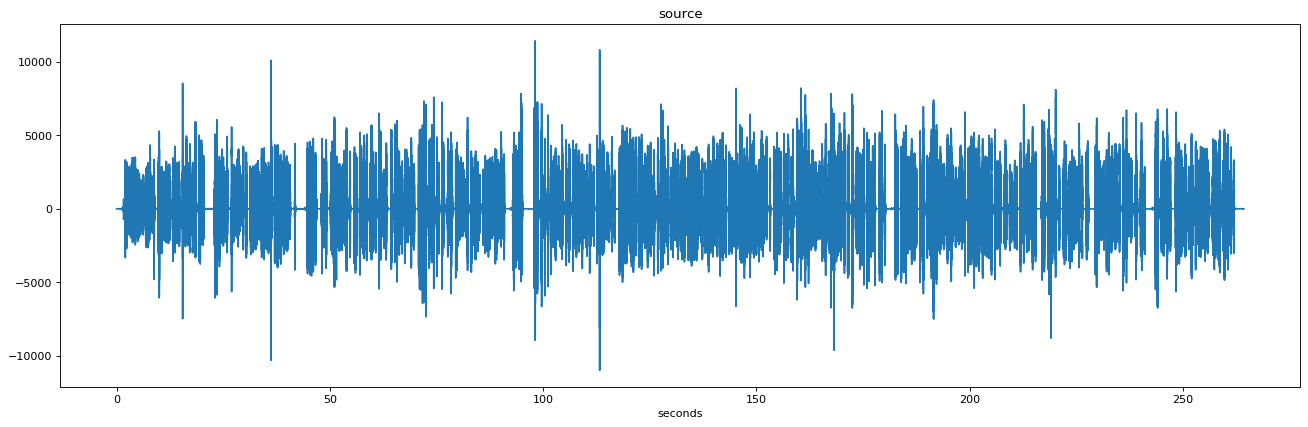

In [15]:
x_source = np.arange(0, source.size) / rate# type: ignore
figure(figsize=(20, 6), dpi=80)
plt.plot(x_source, source)
plt.xlabel('seconds')
plt.title('source')

In [16]:
from scipy import signal

In [17]:
# compute the cross-correlation
z = signal.correlate(source, snippet, mode='same')

In [18]:
source.size == z.size # type: ignore

True

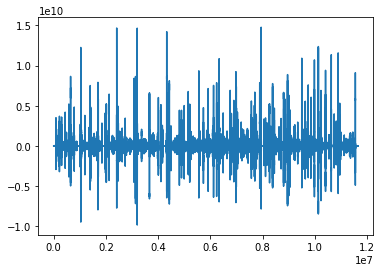

In [19]:
plt.plot(z)

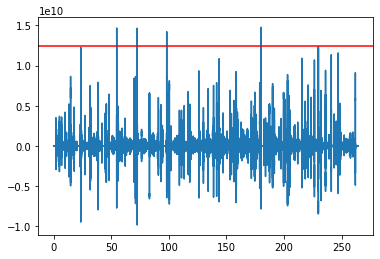

In [34]:
x_z = np.arange(0, z.size) / rate
plt.plot(x_z, z)   # type: ignore
plt.axhline(1.25e10, color='r')
plt.show()

In [35]:
peaks = signal.find_peaks(
    z,
    height=1.25e10,
    distance=50000
)
peaks

(array([2414075, 3199060, 4329192, 7945665], dtype=int64),
 {'peak_heights': array([1.46823234e+10, 1.46592008e+10, 1.42248845e+10, 1.47773324e+10])})

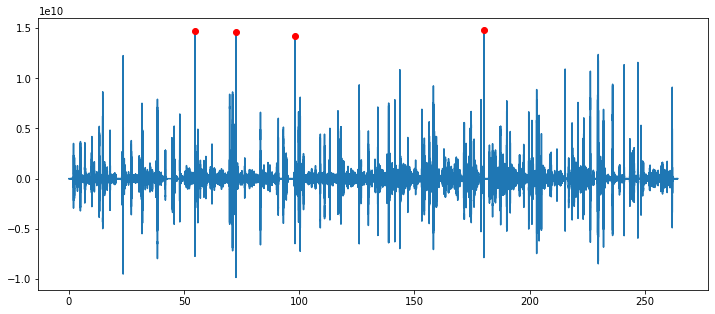

In [38]:
peaks_idxs = peaks[0]
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(x_z, z)
plt.plot(x_z[peaks_idxs], z[peaks_idxs], 'or')

peak 0: start 54.65 end 54.83
peak 1: start 72.45 end 72.63
peak 2: start 98.07 end 98.26
peak 3: start 180.08 end 180.27


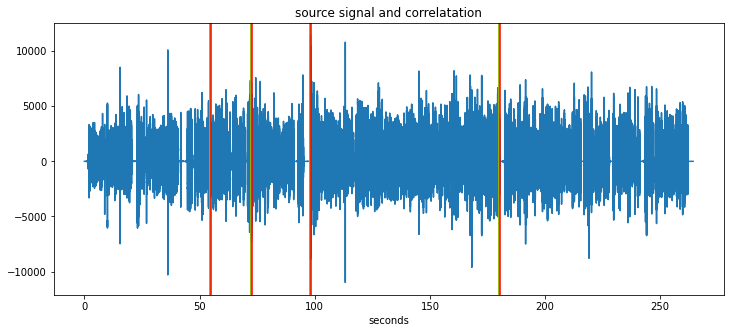

In [37]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(x_source, source)
plt.xlabel('seconds')
plt.title('source signal and correlatation')
for i, peak_idx in enumerate(peaks_idxs):
    start = (peak_idx-snippet.size/2) / rate #type: ignore
    center = (peak_idx) / rate
    end   = (peak_idx+snippet.size/2) / rate #type: ignore
    plt.axvline(start,  color='g')
    plt.axvline(center, color='y')
    plt.axvline(end,    color='r')
    print(f"peak {i}: start {start:.2f} end {end:.2f}")

In [8]:
from pydub import AudioSegment

input_data = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"

def split_audio_by_pattern(original_file, pattern_file):
    original = AudioSegment.from_wav(original_file)
    pattern = AudioSegment.from_wav(pattern_file)
    chunk_duration = len(pattern)
    chunks = original[::chunk_duration]
    for i, chunk in enumerate(chunks):
        chunk.export(f"{absolute_path}/dataset/Son/KH-CN/processed/split_{i}.wav", format="wav")

In [9]:
snippet = f"{absolute_path}/pattern/AnhSon/reduce-noise/test0.wav"
source = input_data

In [10]:
print(snippet, source)

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/pattern/AnhSon/reduce-noise/test0.wav E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/dataset/Son/KH-CN/KH-CN03.wav


In [23]:
snippet = f"{absolute_path}/pattern/AnhSon/reduce-noise/"

In [21]:
# audio_segment.export(f"{absolute_path}/dataset/Son/KH-CN/processed/pro{i}.wav", format="wav")

In [32]:
from pydub import AudioSegment
import numpy as np

def split_audio(original_file, pattern_file):
    original = AudioSegment.from_file(original_file)
    pattern = AudioSegment.from_file(pattern_file)

    original_samples = np.array(original.get_array_of_samples())
    pattern_samples = np.array(pattern.get_array_of_samples())

    correlation = np.correlate(original_samples, pattern_samples, mode='valid')

    split_indexes = np.where(correlation == np.max(correlation))[0]
    
    split_times = [(i + len(pattern_samples)) / original.frame_rate for i in split_indexes]
    split_times = [x * original.frame_rate for x in split_times]
    
    split_audio = [original[i:j] for i, j in zip([None, *split_times], split_times + [None])]

    for i, audio_segment in enumerate(split_audio):
        audio_segment.export(f"{absolute_path}/dataset/Son/KH-CN/processed/pro{i}.wav", format="wav")

In [33]:
os.listdir(snippet)

['test0.wav',
 'test1.wav',
 'test2.wav',
 'test3.wav',
 'test4.wav',
 'test5.wav',
 'test6.wav',
 'test7.wav']

In [34]:
for c, f in enumerate(os.listdir(snippet)):
    split_audio(source, f"{absolute_path}/pattern/AnhSon/reduce-noise/{f}")